In [1]:
pwd

'C:\\Users\\patil\\OneDrive\\Desktop\\PythonProject'

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Step 2: Import the dataset provided
loan_db = pd.read_csv("loan_prediction.csv")

In [5]:
print(loan_db)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [6]:
print(loan_db.head())  # Display the first few rows
print(loan_db.info())  # Display data types and non-null values
print(loan_db.describe())  # Display summary statistics

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
# Step 4: Deal with missing values if any
print(loan_db.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
loan_db['LoanAmount_log']=np.log(loan_db['LoanAmount'])
loan_db['Gender'].fillna(loan_db['Gender'].mode()[0],inplace=True)
loan_db['Married'].fillna(loan_db['Married'].mode()[0],inplace=True)
loan_db['Dependents'].fillna(loan_db['Dependents'].mode()[0],inplace=True)
loan_db['Self_Employed'].fillna(loan_db['Self_Employed'].mode()[0],inplace=True)
loan_db.LoanAmount = loan_db.LoanAmount.fillna(loan_db.LoanAmount.mean())
loan_db.LoanAmount_log = loan_db.LoanAmount_log.fillna(loan_db.LoanAmount_log.mean())
loan_db['Loan_Amount_Term'].fillna(loan_db['Loan_Amount_Term'].mode()[0],inplace=True)
loan_db['Credit_History'].fillna(loan_db['Credit_History'].mode()[0],inplace=True)

In [11]:
loan_db.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

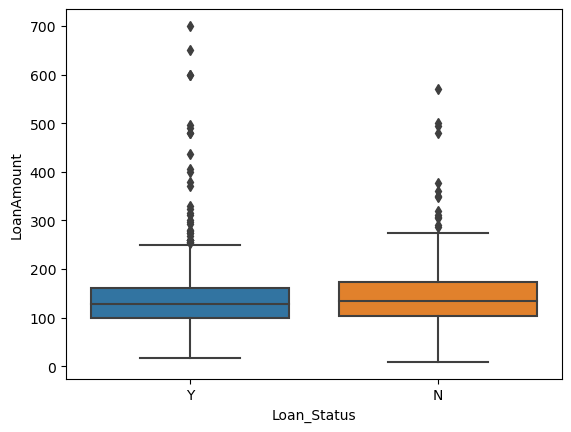

In [12]:
# Step 5: Do some visualization if necessary
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_db)
plt.show()

In [13]:
# Step 6: Divide the dataset into training and test datasets
X = loan_db.drop('Loan_Status', axis=1)
y = loan_db['Loan_Status']

In [15]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,5.231109


In [16]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 7: Build the machine learning model which is suitable for the dataset
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Initialize the model
model = RandomForestClassifier(random_state=42)

In [29]:
X_train = X_train.drop('Loan_ID', axis=1)
X_test = X_test.drop('Loan_ID', axis=1)

In [30]:
# Step 8: Fit the model on the training dataset
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Step 9: Test the model and find the accuracy on the test and training datasets
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.77


In [34]:
# Step 10: Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[19 24]
 [ 4 76]]
